*  Import csv  for file reading
*   Import numpy for numpy operations
*   Import random for random sampling
*   Import matplotlib and scipy.interpolate for ploting graphs


In [1]:
import csv
from random import randrange
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import pandas as pd
# Enter You Name Here
myname = "Aditi Bagora"


***Created a class called node to store information gain, left, right subtrees and data and class label associated to that node***

In [2]:
class Node():
        def __init__(self, index=-1, value=-1, left=None, right=None, info_gain=-1, cvalue=None):
            ''' constructor '''
            # for decision node
            self.Index = index
            self.Value = value
            self.Left = left
            self.Right = right
            self.Left_subtree = left
            self.Right_subtree = right
            self.Info_gain = info_gain
            # for leaf node
            self.Cvalue = cvalue

**Created a class called decision tree has two parameters root node and minimin sample split value**.

***Class contains a main method learn that uses recursion to build the tree and  various helper methods to find best split,Information gain,Entropy,GiniIndex value, Printing of tree,classification,ploting of accuracies,Maximum class label count***

In [3]:
class DecisionTree():
        root = Node()
        min_samples_split = 0
        def learn(self, training_set, method):
              num_samples, num_features = np.shape(training_set)
              if num_samples>=self.min_samples_split:
                node = self.get_split(training_set, method)
                # check if information gain is positive
                if node.Info_gain > 0:
                    node.Left_subtree = self.learn(node.Left, method)
                    node.Right_subtree = self.learn(node.Right, method)
                    return Node(node.Index, node.Value, node.Left_subtree,
                                node.Right_subtree, node.Info_gain, None)
                return Node(cvalue=node.Cvalue)
              return Node(cvalue=self.Majority_Class_Label(training_set[:,num_features-1]))

            # implement this function
        def print_tree(self, tree=None, indent=" "):
            if tree is None:
                return
            if tree.Cvalue is not None:
                print(tree.Cvalue)
            else:
                print("X_" + str(tree.Index), "<=", tree.Value, "?", tree.Info_gain)
                print("%sleft:" % (indent), end="")
                self.print_tree(tree.Left_subtree, indent + indent)
                print("%sright:" % (indent), end="")
                self.print_tree(tree.Right_subtree, indent + indent)

        def classify(self, test_instance, tree):
           if tree is not None:
            if tree.Cvalue is not None:
                return tree.Cvalue
            feature_val = test_instance[tree.Index]
            if float(feature_val) <= float(tree.Value):
                return self.classify(test_instance, tree.Left_subtree)
            else:
                return self.classify(test_instance, tree.Right_subtree)

        def get_split(self, dataset, method):
            num_samples, num_features = np.shape(dataset)
            dataset_array=np.array([row for row in dataset])
            optimal_split = Node()
            max_gain = -float("inf")
            for feature_index in range(num_features-1):
                feature_values = dataset_array[:, feature_index]
                possible_values = np.unique(feature_values)
                for val in possible_values:
                    dataset_left = np.array([row for row in dataset if row[feature_index] <= val])
                    dataset_right = np.array([row for row in dataset if row[feature_index] > val])
                    # check if dataset are not null
                    if len(dataset_left) > 0 and len(dataset_right) > 0:
                        parent, left_y, right_y = dataset_array[:, num_features-1], dataset_left[:, num_features-1], dataset_right[:, num_features-1]
                        # Information gain
                        curr_gain, class_label = self.Information_Gain(parent, left_y, right_y, method)
                        # Find optimal split 
                        if curr_gain > max_gain:
                            optimal_split.Index = feature_index
                            optimal_split.Value = val
                            optimal_split.Left = dataset_left
                            optimal_split.Right = dataset_right
                            optimal_split.Info_gain = curr_gain
                            optimal_split.Cvalue = class_label
                            max_gain = curr_gain

            # return optimal split
            return optimal_split
            
        def Information_Gain(self, parent, l_child, r_child, method):
            ''' function to compute variance reduction '''
            probability_l = len(l_child) / len(parent)
            probability_r = len(r_child) / len(parent)
            if method == 'Entropy':
                EParent = self.Entropy(parent)
                Elchild = self.Entropy(l_child)
                Erchild = self.Entropy(r_child)
                Gain = EParent - (probability_l * Elchild + probability_r * Erchild)
                if Elchild == 0 or Elchild == 1:
                    class_label = l_child[0]
                elif Erchild == 0 or Erchild == 1:
                    class_label = r_child[0]
                else:
                    class_label = self.Majority_Class_Label(parent)
            else:
                GParent = self.GiniIndex(parent)
                Glchild = self.GiniIndex(l_child)
                Grchild = self.GiniIndex(r_child)
                Gain = GParent - (probability_l * Glchild + probability_r * Grchild)
                if Glchild == 0 or Glchild == 1:
                    class_label = l_child[0]
                elif Grchild == 0 or Grchild == 1:
                    class_label = r_child[0]
                else:
                    class_label = self.Majority_Class_Label(parent)
            return Gain, class_label

        def Majority_Class_Label(self, dataset_label):
             unique_class_label = np.unique(dataset_label)
             max_label_count=0
             for class_label in unique_class_label:
                class_label_count = len(dataset_label[dataset_label == class_label])
                if class_label_count > max_label_count:
                  max_label_count= class_label_count
                  max_label = class_label
             return max_label

        def Entropy(self, child):
            entropy = 0
            unique_class_label = np.unique(child)
            for class_label in unique_class_label:
                probability_class_label = len(child[child == class_label]) / len(child)
                entropy += (-probability_class_label * np.log2(probability_class_label))
            return entropy

        def GiniIndex(self, child):
            GiniIndex = 0
            unique_class_label = np.unique(child)
            for class_label in unique_class_label:
                probability_class_label = len(child[child == class_label]) / len(child)
                GiniIndex += probability_class_label * probability_class_label
            return 1 - GiniIndex

        def plot_accuracy(self, accuracy_plot):
           k=0
           for acc_list in  accuracy_plot:
               y1=list()
               for i in range(len(acc_list)):
                  y1.append(i+1)
               X_Y_Spline = make_interp_spline(y1, acc_list)
               X_ = np.linspace(1, 10, 500)
               Y_ = X_Y_Spline(X_)  
               if k==0:
                 label='Entropy'
               if k==1:
                 label='Gini Index'
               if k==2:
                 label='Pre Pruning'    
               k=k+1 
               plt.plot(X_, Y_, label=label)
           plt.xlabel('kth - fold')
           plt.ylabel('Accuracy')
           plt.title('Accuracy Plot ')
           plt.legend()
           plt.show()

        def plot_modelselection(self, accuracy_plot):
           y1=list()
           for i in range(len(accuracy_plot)):
                  y1.append(10*i)
           plt.plot(y1, accuracy_plot, label="Accuracy")
           plt.xlabel('kth - fold')
           plt.ylabel('Accuracy')
           plt.title('Accuracy Plot ')
           plt.legend()
           plt.show()

        #Defined but not used   
        def reduced_error_pruning(self, tree):
           if tree.Left_subtree is not None:
            while tree.Left_subtree.Info_gain != 0:
                tree = tree.Left_subtree
            data_set_Combined = tree.Left+tree.Right
            unique_class_label = np.unique(data_set_Combined)
            class_label_f = -1
            for class_label in unique_class_label:
                count = len(data_set_Combined[data_set_Combined == class_label])
                max_count = count
                if count > max_count:
                    class_label_f = class_label
            tree = Node(cvalue=class_label_f)
            return tree

**Main method that calls various combinations and setting based on user input and perform k fold cross validation on each setting and calculating mean accuracies in different settings and plotting them**

In [4]:
def run_decision_tree():
        # Load data set
        with open("wine-dataset.csv") as f:
            next(f, None)
            data = [tuple(line) for line in csv.reader(f, delimiter=",")]
        print("Number of records: %d" % len(data))
        # Split training/test sets
        # You need to modify the following code for cross validation.
        K = 10
        accuracy_mean = 0
        folds = CreateFoldsWithRandomStartifiedSampling(data, K)
        choice = 1
        accuracy_plot = list()
        while 1:
            accuracy_mean = 0
            accuracy_list = list()
            for i in range(K):
                training_set, test_set = GetTrainingAndTestDataForFold(i, folds)
                if choice == 1:
                   accuracy = Decision_Tree_Entropy_Setting(training_set,test_set)
                elif choice == 2:
                   accuracy = Decision_Tree_GiniIndex_Setting(training_set,test_set)
                elif choice == 3:
                    ''' accuracy_mean = sum(accuracy_plot[0]) / len(accuracy_plot[0])
                    sample_size = Model_Selection_PrePruning(training_set, accuracy_mean)'''
                    accuracy = Decision_Tree_PrePruning_Setting(training_set, test_set)
                accuracy_list.append(accuracy)
                accuracy_mean=sum(accuracy_list)/len(accuracy_list)
            print("Accuracy Mean: %.4f" % float(accuracy_mean))
            accuracy_plot.append(accuracy_list)
            print("Want Improve accuracy?  \n 1. Yes(y) \n 2.No(n)")
            Iscontinue = input()
            if Iscontinue == 'y':
                print("Select a method \n 1. GiniIndex \n 2.Pruning")
                var = int(input())
                if var == 2:
                    choice = 3
                else:
                    choice = 2
            else:
                break ;
        tree=DecisionTree() 
        WriteToFile(f,accuracy_plot)       
        tree.plot_accuracy(accuracy_plot)


Writing into file

In [5]:
def WriteToFile(f,acc_list):
   f = open(myname + "result.txt", "w")
   k=0
   for acc in acc_list:
      label=GetLabel(k)
      k=k+1
      f.write(label)
      for val in acc: 
        f.write("accuracy: %.4f" % val)
   f.close()

In [6]:
def GetLabel(k):
  label='results'
  if k==0:
    label='Entropy results'
  if k==1: 
     label='Gini Index results'
  if k==2:
    label='Pre Pruning results'
  return label      

**Splits data into trainning and test based on the input kth fold**

In [7]:
def GetTrainingAndTestDataForFold(k,folds):
            training_set = list()
            for j in range(8):
                fold = folds[(k + j) % 9]
                for data_points in fold:
                    training_set.append(data_points)
            test_set = folds[9 - k]
            return training_set,test_set

**This method classifies the test set given the model and outputs accuracy**

In [8]:
def Test_Model(model, test_set)  :
        results = []
        for instance in test_set:
            result = model.classify(instance[:-1], model.root)
            results.append(result == instance[-1])
        # Accuracy
        accuracy = float(results.count(True)) / float(len(results))
        return accuracy


***Defines a Entropy setting where methos is 'Entropy' given trainning and test data it learns a model and calls test model to get the accuracy on test data for the learned model***

In [9]:
def Decision_Tree_Entropy_Setting(training_set,test_set):
        tree = DecisionTree()
        # Construct a tree using training set
        tree.root = tree.learn(training_set, 'Entropy')
        accuracy=Test_Model(tree,test_set)
        return accuracy


***Defines a GiniIndex setting where methos is 'GiniIndex' given trainning and test data it learns a model and calls test model to get the accuracy on test data for the learned model***

In [10]:
def Decision_Tree_GiniIndex_Setting(training_set,test_set):
        tree = DecisionTree()
        tree.min_samples_split=10
        # Construct a tree using training set
        tree.root = tree.learn(training_set, 'GiniIndex')
        accuracy=Test_Model(tree,test_set)
        return accuracy

***Defines a Pre Pruning setting where method is 'Entropy' and minimum_sample split is also learned on a validation set, given trainning and test data it learns a model and calls test model to get the accuracy on test data for the learned model***

In [11]:
def Decision_Tree_PrePruning_Setting(training_set,test_set,sample_size=10):
        tree = DecisionTree()
        tree.min_samples_split=sample_size
        # Construct a tree using training set
        tree.root = tree.learn(training_set, 'Entropy')
        accuracy=Test_Model(tree,test_set)
        return accuracy

***The model starts with an accuracy in the input and checks if the accuracy improves with different min_sample_sizes it returns the maximum sample size which either increases the accuracy or keeps it the same.For accessing the accuracy it simply divides the sampled data into training and validation set and tests on validation set***

In [12]:
def Model_Selection_PrePruning(training_set,accuracy):
    start = min_sample = 10
    accuracy_list=list()
    accuracy_list.append(accuracy)
    max_accuracy = accuracy
    folds = CreateFoldsWithRandomStartifiedSampling(training_set,10)
    training_set, validation_set = GetTrainingAndTestDataForFold(1, folds)
    j=int(len(training_set) / start)
    for i in range(j):
        accuracy = Decision_Tree_PrePruning_Setting(training_set, validation_set, min_sample)
        accuracy_list.append(accuracy)
        if accuracy < max_accuracy:
            tree = DecisionTree()
            tree.plot_modelselection(accuracy_list)
            return min_sample - start
        else:
            min_sample = min_sample + start
            max_accuracy=accuracy  

**This create folds method simply takes the data as input and make different folds in that order and returns the folds**

In [13]:
def CreateFolds(data, K):
        folds = list()
        test_set = data
        fold_size = int(len(test_set) / K)
        for i in range(10):
            fold = list()
            for j in range(fold_size):
                index = i*fold_size+j
                fold.append(data[index])
            folds.append(fold)
        return folds

**This method create folds by startifying the data and randomly distributing the data into folds and then returns the folds**

In [14]:
def CreateFoldsWithRandomSampling(data, K):
        folds = list()
        test_set = data
        fold_size = int(len(test_set) / K)
        for i in range(9):
            fold = list()
            while len(fold) < fold_size:
                index = randrange(len(test_set))
                fold.append(test_set.pop(index))
            folds.append(fold)
        folds.append(test_set)
        return folds

**This method create folds by startifying the data and randomly distributing the data into folds while maintaing the proportions of the classes in each fold and then returns the folds**

In [15]:
def CreateFoldsWithRandomStartifiedSampling(data, K):
        folds = list()
        test_set = data
        dataset = np.array([row for row in data])
        unique_class_label = np.unique(dataset[:,np.shape(dataset)[1]-1])
        probability_class_label=list()
        for class_label in unique_class_label:
             probability_class_label.append(len(dataset[:,np.shape(dataset)[1]-1][dataset[:,np.shape(dataset)[1]-1] == class_label]) / len(dataset[:,np.shape(dataset)[1]-1]))
        fold_size = int(len(test_set) / K)
        proportion_c1=probability_class_label[0]*fold_size 
        proportion_c2=probability_class_label[1]*fold_size     
        
        for i in range(9):
            fold = list()
            while len(fold) < proportion_c1:
                index = randrange(len(test_set))
                fold.append(test_set.pop(index))
            while len(fold) < proportion_c2:
                index = randrange(len(test_set))
                fold.append(test_set.pop(index))    
            folds.append(fold)
        folds.append(test_set)
        return folds

Number of records: 4898
Accuracy Mean: 0.8194
Want Improve accuracy?  
 1. Yes(y) 
 2.No(n)
y
Select a method 
 1. GiniIndex 
 2.Pruning
1
Accuracy Mean: 0.8022
Want Improve accuracy?  
 1. Yes(y) 
 2.No(n)
y
Select a method 
 1. GiniIndex 
 2.Pruning
2
Accuracy Mean: 0.8352
Want Improve accuracy?  
 1. Yes(y) 
 2.No(n)
n


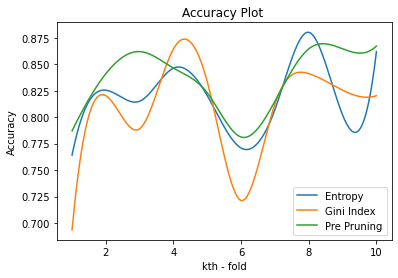

In [16]:
if __name__ == "__main__":
        run_decision_tree()